# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Introduction: Business Problem

In this project we will be finding placeses in India which are more affected by Covid19 Spread. 
We will also try to detect Intensity of Covid cases in these areas. Specifically, this report will be targeted in interest of Government, NGO and public to identify most affected regions.

Since, Covid is spreading in many parts of India, we will try to detect the groth of coronavirus in different parts of India and which states where able to control the groth of covid19.

## Data

We will extract our data from kaggle, as per cases resgister till 26th of april.

Following data sources will be needed to extract/generate the required information:
* Individual cases register with date.
* State in which cases where register.
* District from wher patitent belongs.
* Total cases count Statewise.
* Cases coumt according to dates in each state.

## Import Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df_states= pd.read_csv("C:\\Users\\prasa\\Desktop\\New folder\\Covid_19_india.csv")
df_indi=pd.read_csv("C:\\Users\\prasa\\Desktop\\New folder\\IndividualDetails.csv")

In [3]:
df_states.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df_states.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1345,1346,26/04/20,5:00 PM,Telengana,-,-,280,26,991
1346,1347,26/04/20,5:00 PM,Tripura,-,-,2,0,2
1347,1348,26/04/20,5:00 PM,Uttarakhand,-,-,26,0,50
1348,1349,26/04/20,5:00 PM,Uttar Pradesh,-,-,289,29,1843
1349,1350,26/04/20,5:00 PM,West Bengal,-,-,105,18,611


This data contains cases of confirmed, cured, deaths StateWise with dates. We will be using this data to Determine which states are most affected from covid19. We will use this data to visualize the groth of covid19 in india statewise with date.

In [5]:
df_indi.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [6]:
df_indi.tail()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
27885,27886,NaN,26/04/2020,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,26/04/2020,Details awaited
27886,27887,NaN,26/04/2020,NaN,NaN,NaN,NaN,Uttarakhand,NaN,Hospitalized,26/04/2020,Details awaited
27887,27888,NaN,26/04/2020,12,F,NaN,Munger,Bihar,NaN,Hospitalized,26/04/2020,Details awaited
27888,27889,NaN,26/04/2020,13,F,NaN,Munger,Bihar,NaN,Hospitalized,26/04/2020,Details awaited
27889,27890,NaN,26/04/2020,17,F,NaN,Munger,Bihar,NaN,Hospitalized,26/04/2020,Details awaited


## Nation Wise

On National level we will be using this data to count the ratio of cases count based on gender. We will visualize increase in cases in india and increase in daily cases in india.

### Gender

Now we will count the people affected from covid19 and visualize it based on gender.

In [7]:
df_gender=df_indi.groupby('gender')
df_gender=pd.DataFrame(df_gender.size().reset_index(name='count'))

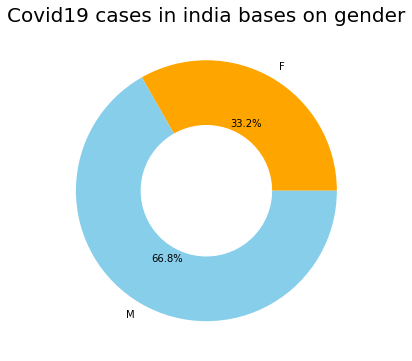

In [8]:
custom_colors = ['orange','skyblue']
plt.figure(figsize = (6,6))
plt.pie(df_gender['count'], labels = df_gender['gender'], colors = custom_colors, autopct='%1.1f%%')
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Covid19 cases in india bases on gender', fontsize = 20)
plt.show()

As we can see clearly that the gender ratio of covid19 cases 66.8% Male and 33.2% Female. Males are more affected by covid19 in India Compared to female.

### PROGRESSION OF CASE COUNT IN INDIA

In this section, we will have a look at how the number of cases increased in India. Afterwards, we will inspect this curve.

For doing this analysis, I had to modify the dataset a bit. I grouped the data on the basis of the diagnosed data feature so that I had a count of number of cases detected each day throughout India. I followed this up by doing a cumulative sum of this feature and adding it to a new column.

In [9]:
df_date=df_indi.groupby('diagnosed_date')
df_date=pd.DataFrame(df_date.size().reset_index(name='count'))

In [10]:
df_date[['Day','Month','Year']] = df_date.diagnosed_date.apply( 
   lambda x: pd.Series(str(x).split("/")))
df_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
df_date.reset_index(inplace = True)
df_date['Cumulative Count'] = df_date['count'].cumsum()
df_date = df_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
df_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [11]:
df_date1=df_date.drop('count',axis=1)

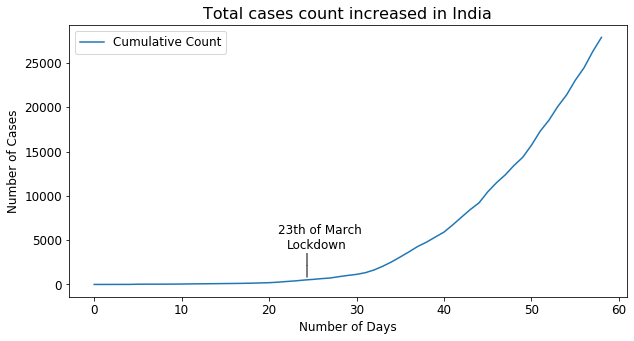

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
df_date1.plot(ax=ax)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('Total cases count increased in India', size=16)


ax.text(21, 5750, "23th of March")
ax.text(22, 4050, "Lockdown")
ax.text(24, 1150, "|")
ax.text(24, 2556, "|")
plt.show()

In the above curve, we see that the rise was more or less steady till the 20th day mark. In the interval between 20–30, the curve inclined a little. This inclination gradually incremented and we see a steady and steep slope after 30-day mark with no signs of flattening. These are ominous indications.

### Daily cases count in India

In this section, we will see how daily cases are increasing Nation Wise.

We are going to use same dataframe df_date that we used previously, and this time we will use daily count and plot Bar chart to visualize the incresing trend of covid19 cases in india.

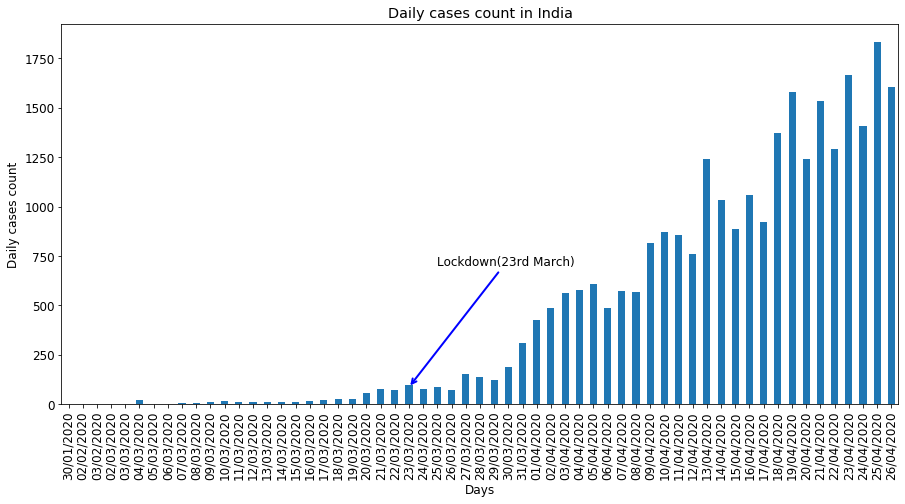

In [13]:
df_date.plot(x='diagnosed_date',y='count',kind='bar',figsize=(15,7),legend=False)
plt.xlabel('Days') # add to x-label to the plot
plt.ylabel('Daily cases count') # add y-label to the plot
plt.title('Daily cases count in India') # add title to the plot

plt.annotate('Lockdown(23rd March)',                 
             xy=(24, 86),            
             xytext=(26, 700),        
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

The cases count were normal till 28th of march and then cases count started to increase gradualy even after lockdown. Most cases are due to religious gathering at Nizamuddin Markaz in Delhi of more then 2000 people.

### Displaying statewise data on map of india

We will use shape file of India with state boundries. This data contains geometry of each state.

In [14]:
map_data = gpd.read_file('C:\\Users\\prasa\\Desktop\\New folder\\Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


Data type of date column is object type so, will convert it to DateTime format. Since, some of the state have different spelling 
in states data i have changed them according to map_data.

In [15]:
df_states.dropna(how='all',inplace=True)
df_states['DateTime'] = pd.to_datetime(df_states['Date'], format = '%d/%m/%y')

In [16]:
map_data['States/UT'] = map_data['States/UT'].str.replace('&','and')
map_data['States/UT'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [17]:
last_date = df_states.DateTime.max()
df_states = df_states[df_states['DateTime']==last_date]

In [18]:
columns = ['State/UnionTerritory', 'Cured', 'Deaths','Confirmed']
df_plot = df_states[columns]
df_plot.sort_values('Confirmed',inplace=True, ascending=False)
df_plot.reset_index(drop=True,inplace=True)
df_plot.rename(columns={'State/UnionTerritory':'States/UT'},inplace=True)
df_plot.head()

C:\Users\prasa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prasa\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,States/UT,Cured,Deaths,Confirmed
0,Maharashtra,1076,323,7628
1,Gujarat,282,133,3071
2,Delhi,869,54,2625
3,Madhya Pradesh,210,99,2096
4,Rajasthan,493,33,2083


In [19]:
# we will merge both datframe to plot the map
merged_data = pd.merge(map_data, df_plot, 
                       how = 'left', on = 'States/UT')
merged_data.head()

,States/UT,geometry,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",11.0,0.0,33.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,0.0,1.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",19.0,1.0,36.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",46.0,2.0,251.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",17.0,0.0,30.0


C:\Users\prasa\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


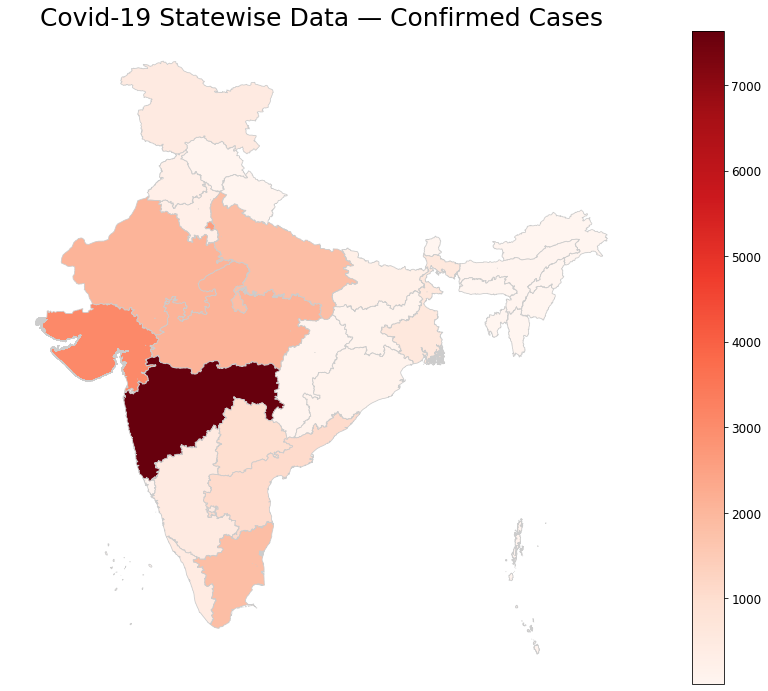

In [20]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', cmap='Reds', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

This map demonstrate intensity of covid19 cases in India as per 26th of april. We can clearly see Maharastra has the most confirmed cases in India followed by Gujarat and Delhi on 2nd and 3rd number.

## State Wise

We will visualize the increasing trend of covid 19 in different states.

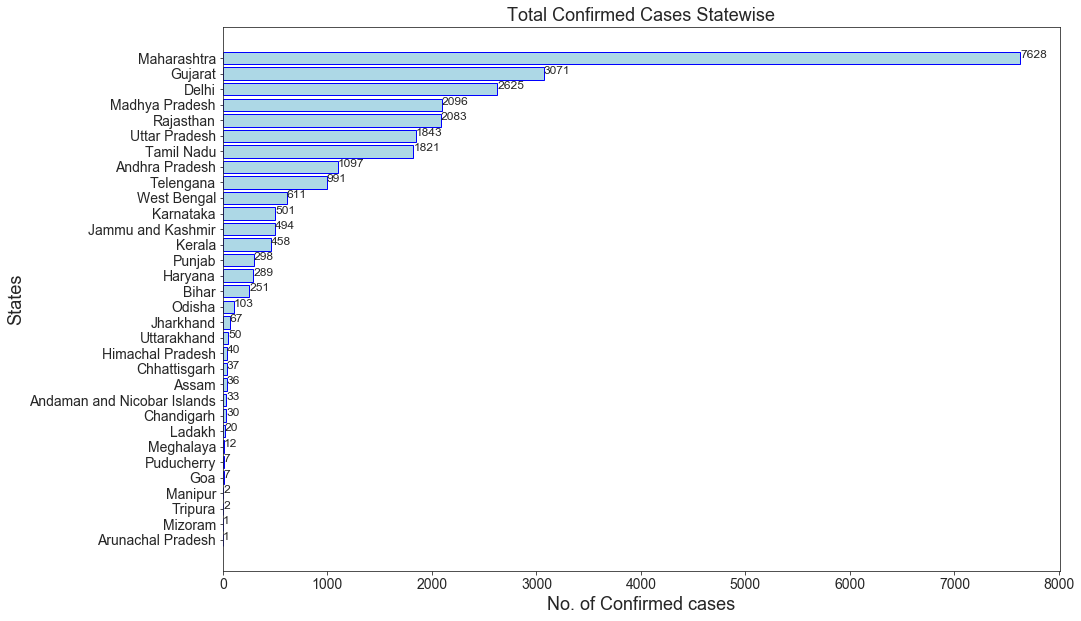

In [21]:
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(df_plot["States/UT"],df_plot["Confirmed"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(df_plot["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()

In [22]:
df_s=pd.read_csv("C:\\Users\\prasa\\Desktop\\New folder\\Covid_19_india.csv")

#We will convert date formate
df_s['DateTime'] = pd.to_datetime(df_s['Date'], format = '%d/%m/%y')

Text(0.5, 1.0, 'India Covid19 groth state wise')

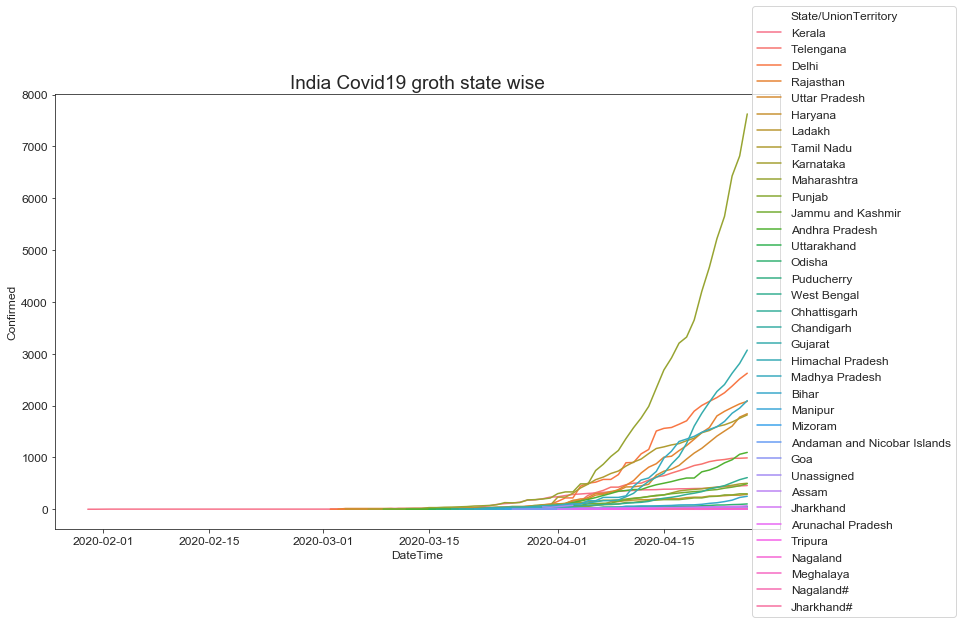

In [23]:
# Ploting line plot for cases after 15-02-2020
plt.figure(figsize=(13,8))

sns.lineplot(data=df_s, x='DateTime', y='Confirmed', hue='State/UnionTerritory')
plt.legend(loc='right',bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('India Covid19 groth state wise',size=19)

In the above curve, the cases were steady till starting of april. The cases started to increase with great incline in april specialy for Maharashtra. The cases count in Maharashtra started to increase gradualy and we see a steep incline in Maharshtra curve. 

To Understand the condition of cases of Maharashtra lets Visualize Districts of Maharashtra.

In [24]:
mah_data=gpd.read_file('C:\\Users\\prasa\\Desktop\\New folder\\maps-master\\2011_Dist.shp')
mah_data=mah_data[mah_data['ST_NM']=='Maharashtra']
mah_data.drop(columns={'ST_NM','DT_CEN_CD','censuscode','ST_CEN_CD'},inplace=True)
mah_data.reset_index(drop=True)
mah_data.head()

,DISTRICT,geometry
3,Ahmadnagar,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
6,Akola,"POLYGON ((77.61612 20.75991, 77.61167 20.75865..."
15,Amravati,"POLYGON ((78.34151 21.58875, 78.34678 21.58112..."
29,Aurangabad,"POLYGON ((75.88953 20.56336, 75.88833 20.56141..."
70,Bhandara,"POLYGON ((79.92223 21.52415, 79.92438 21.51988..."


In [25]:
df_mah=pd.read_csv('C:\\Users\\prasa\\Desktop\\New folder\\IndividualDetails.csv')
df_mah=df_mah[df_mah['detected_state']=='Maharashtra']
df_dist=df_mah['detected_district'].value_counts()
df_dist=pd.DataFrame(df_dist)

In [26]:
df_dist.reset_index(inplace=True)
df_dist.rename(columns={'index':'DISTRICT','detected_district':'Confirmed'},inplace=True)

In [27]:
merged_data = pd.merge(mah_data, df_dist, 
                       how = 'left', on = 'DISTRICT')
merged_data.head()

,DISTRICT,geometry,Confirmed
0,Ahmadnagar,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",NaN
1,Akola,"POLYGON ((77.61612 20.75991, 77.61167 20.75865...",20.0
2,Amravati,"POLYGON ((78.34151 21.58875, 78.34678 21.58112...",7.0
3,Aurangabad,"POLYGON ((75.88953 20.56336, 75.88833 20.56141...",31.0
4,Bhandara,"POLYGON ((79.92223 21.52415, 79.92438 21.51988...",NaN


C:\Users\prasa\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


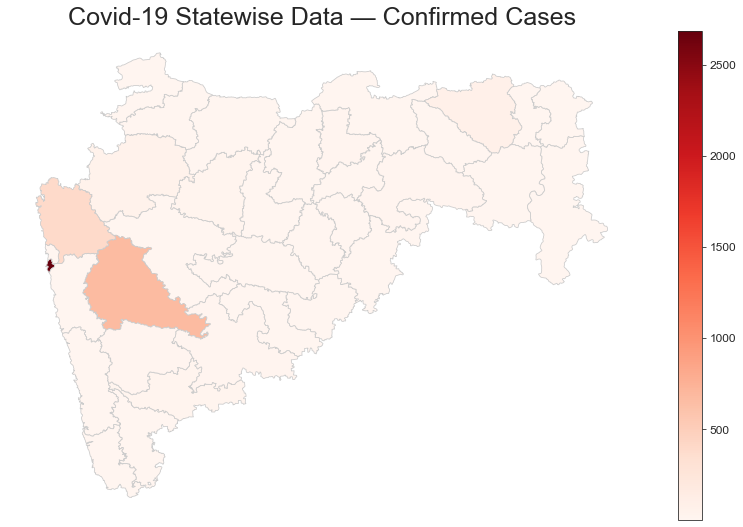

In [28]:
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', cmap='Reds', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

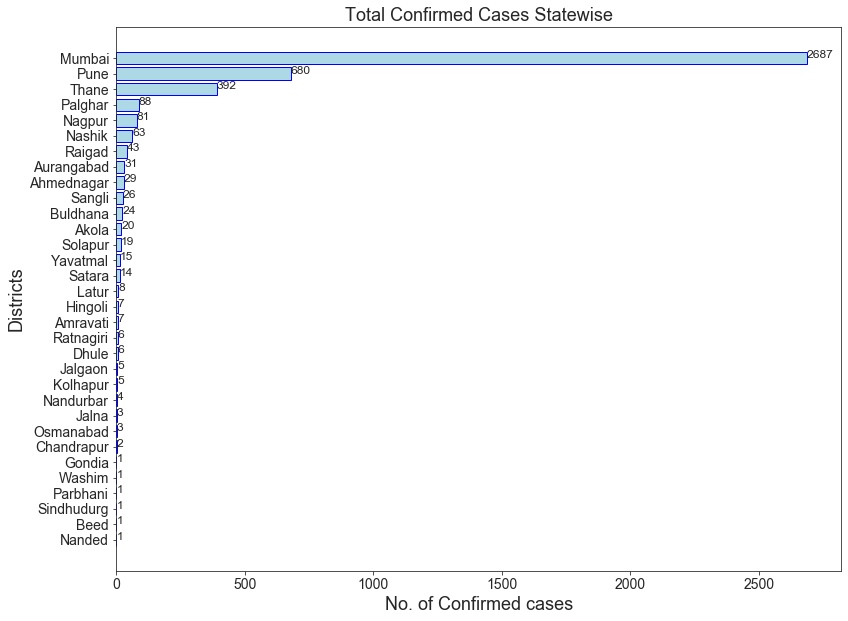

In [29]:
sns.set_style("ticks")
plt.figure(figsize = (13,10))
plt.barh(df_dist["DISTRICT"],df_dist["Confirmed"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('Districts', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(df_dist["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()

As we can see Mumbai has most cases in Mumbai follwed by Pune and Thane. So, clearly Mumbai has the worst Condition in whole country and thus need more resources like medical staff, medical kits, beds, quarentine centers and more police force for strict regulation of lockdown.

## Machine learning

In this we will be using old data that we used to plot the groth of covid 19 virus. It contains 60 days of growth. We will predict growth for next 30 days

In [30]:
#Creating dataframe of 120 to plot for 120 days
df_nxtmnth = pd.DataFrame({ 'A' : range(1, 121)})
df_date.reset_index(inplace=True)
df_date.head()

,index,diagnosed_date,count,Cumulative Count
0,0,30/01/2020,1,1
1,1,02/02/2020,1,2
2,2,03/02/2020,1,3
3,3,02/03/2020,2,5
4,4,03/03/2020,1,6


In [31]:
x=df_date[['index']]
y=df_date[['Cumulative Count']]
z=df_nxtmnth[['A']]
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             59 non-null     int64 
 1   diagnosed_date    59 non-null     object
 2   count             59 non-null     int64 
 3   Cumulative Count  59 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [32]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
x = poly.fit_transform(x)
y = poly.fit_transform(y)
z=poly.fit_transform(z)

In [33]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(x, y)
pred=linear_model.predict(z)

In [34]:
#Creating Dataframe and assigning index
pred=pd.DataFrame(data=pred)
pred.columns = ['A', 'B','C','D']

In [35]:
df_pred=pred[['D']]

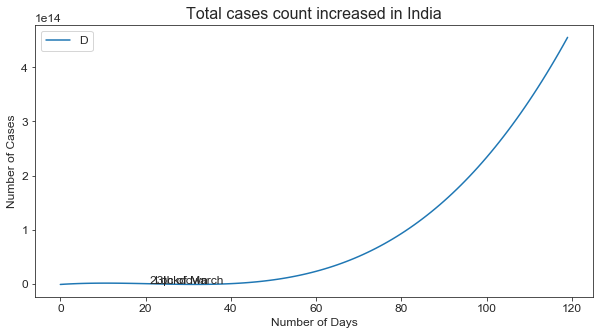

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
df_pred.plot(ax=ax)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('Total cases count increased in India', size=16)

plt.show()